<a href="https://colab.research.google.com/github/BulelaniMab-Malibuye/edsa_port/blob/main/regression_Predict_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [ ]:
dataset= pd.read_csv('Train.csv')
dataset1= pd.read_csv('VariableDefinitions.csv')
dataset2= pd.read_csv('Riders.csv')
test_df= pd.read_csv('Test.csv')

In [ ]:
dataset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
dataset1.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [ ]:
dataset2.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [ ]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [ ]:
#CLEANING THE DATA

def data_clean(df):
    df= df['Temperature'].dropna(how='all')
    return df

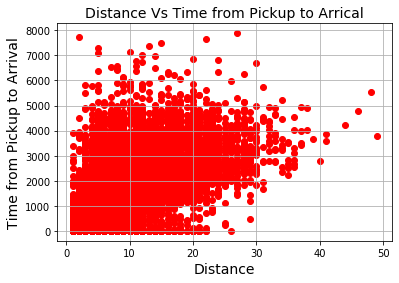

In [ ]:
#Check for linearity

plt.scatter(dataset['Distance (KM)'], dataset['Time from Pickup to Arrival'], color='red')
plt.title('Distance Vs Time from Pickup to Arrical', fontsize=14)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Time from Pickup to Arrival', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Check for Linearity

plt.scatter(dataset['Pickup Lat'],dataset['Arrival at Destination - Time'])
plt.xlabel('Pickup Lat',fontsize=14)
plt.ylabel('Arrival at Destination - Time',fontsize=14)
plt.grid()
plt.show()

In [ ]:
corr = dataset.drop('Arrival at Destination - Time', axis='columns').corr()

In [ ]:
from statsmodels.graphics.correlation import plot_corr

In [ ]:
fig=plot_corr(corr,xnames=corr.columns)

In [ ]:
# import regression module
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split predictors and response
X = dataset[['Distance (KM)']]
y = dataset['Time from Pickup to Arrival']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:

# create model object
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# get predictions on the train set
y_gen = model.predict(X_train)


In [ ]:
print(y_gen)

[ 896.54673136  795.33987742 1301.37414716 ... 1200.16729321 2819.47695639
  896.54673136]


In [ ]:
# get predictions on the test set
y_gen= model.predict(test_df[['Distance (KM)']])

In [ ]:
test_df['Time from Pickup to Arrival']= y_gen

In [ ]:
print(test_df[['Order No','Time from Pickup to Arrival']])

            Order No  Time from Pickup to Arrival
0     Order_No_19248                  1402.581001
1     Order_No_12736                  1098.960439
2       Order_No_768                  1098.960439
3     Order_No_15332                  1098.960439
4     Order_No_21373                  1200.167293
...              ...                          ...
7063   Order_No_3612                  1098.960439
7064   Order_No_7657                  2819.476956
7065   Order_No_1969                  1604.994709
7066  Order_No_10591                  2414.649541
7067   Order_No_1603                  1402.581001

[7068 rows x 2 columns]


In [ ]:
beta_0 = float(model.intercept_)

In [ ]:
print('Intercept',beta_0)

Intercept 596.6498676903542


In [ ]:
from sklearn import metrics
import math

In [ ]:
results=math.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
print('RMSE',results)

RMSE 793.8446114170557


In [ ]:
output=test_df[['Order No','Time from Pickup to Arrival']].copy()
submission=output
submission.to_csv("submission.csv", index=False)